In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph # pip install netgraph

A = 2 # number of actions
S = 4 # number of states

In [2]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [3]:
# create the graph using networkx library
G = nx.DiGraph()
edge_labels = {}

# add nodes and edges to the graph
for state_start in range(S):
    for action_1 in range(A):
        for action_2 in range(A):
            for state_end in range(S):
                if TRANSITION_MATRIX[action_1][action_2][state_start][state_end] > 0:
                    G.add_edge(state_start, state_end)
                    if (state_start, state_end) not in edge_labels:
                        edge_labels[(state_start, state_end)] = str(action_1) + ', ' + str(action_2)
                        edge_labels[(state_start, state_end)] += ', ' + str(TRANSITION_MATRIX[action_1][action_2][state_start][state_end])
                    else:
                        edge_labels[(state_start, state_end)] = edge_labels[(state_start, state_end)] + "\n" + str(action_1) + ', ' + str(action_2)
                        edge_labels[(state_start, state_end)] += ', ' + str(TRANSITION_MATRIX[action_1][action_2][state_start][state_end])
                    print("State: ", state_start, " -> ", state_end, " Action: ", action_1, ", ", action_2, " Probability: ", TRANSITION_MATRIX[action_1][action_2][state_start][state_end])
                    
for i, j in edge_labels.keys():
    G.edges[i,j]['label'] = edge_labels[(i,j)]
    print(i,j)
    print(edge_labels[(i,j)])

State:  0  ->  1  Action:  0 ,  0  Probability:  0.5
State:  0  ->  3  Action:  0 ,  0  Probability:  0.5
State:  0  ->  0  Action:  0 ,  1  Probability:  1.0
State:  0  ->  0  Action:  1 ,  0  Probability:  1.0
State:  0  ->  1  Action:  1 ,  1  Probability:  0.5
State:  0  ->  3  Action:  1 ,  1  Probability:  0.5
State:  1  ->  1  Action:  0 ,  0  Probability:  1.0
State:  1  ->  2  Action:  0 ,  1  Probability:  1.0
State:  1  ->  3  Action:  1 ,  0  Probability:  1.0
State:  1  ->  2  Action:  1 ,  1  Probability:  1.0
State:  2  ->  2  Action:  0 ,  0  Probability:  1.0
State:  2  ->  3  Action:  0 ,  1  Probability:  1.0
State:  2  ->  3  Action:  1 ,  0  Probability:  1.0
State:  2  ->  3  Action:  1 ,  1  Probability:  1.0
State:  3  ->  0  Action:  0 ,  0  Probability:  0.5
State:  3  ->  3  Action:  0 ,  0  Probability:  0.5
State:  3  ->  0  Action:  0 ,  1  Probability:  0.5
State:  3  ->  3  Action:  0 ,  1  Probability:  0.5
State:  3  ->  0  Action:  1 ,  0  Probability

{(0, 1): Text(0.6223154501197465, 0.6580510357091034, '0, 0, 0.5\n1, 1, 0.5'),
 (0, 3): Text(0.8736414676814895, 0.38087946353856683, '0, 0, 0.5\n1, 1, 0.5'),
 (0, 0): Text(1.0, 0.6690789460402087, '0, 1, 1.0\n1, 0, 1.0'),
 (1, 1): Text(-0.510738199521014, 0.6249673047157875, '0, 0, 1.0'),
 (1, 2): Text(-0.6290105674419966, 0.2661436618394313, '0, 1, 1.0\n1, 1, 1.0'),
 (1, 3): Text(-0.25941218195927096, 0.347795732545251, '1, 0, 1.0'),
 (2, 2): Text(-0.9838276712049442, -0.8103272667896376, '0, 0, 1.0'),
 (2,
  3): Text(-0.6142292857222186, -0.7286751960838179, '0, 1, 1.0\n1, 0, 1.0\n1, 1, 1.0'),
 (3,
  0): Text(0.6209244030444685, -0.1955195014647168, '0, 0, 0.5\n0, 1, 0.5\n1, 0, 0.5\n1, 1, 0.5'),
 (3,
  3): Text(0.49456587072595803, -0.48371898396635865, '0, 0, 0.5\n0, 1, 0.5\n1, 0, 0.5\n1, 1, 0.5')}

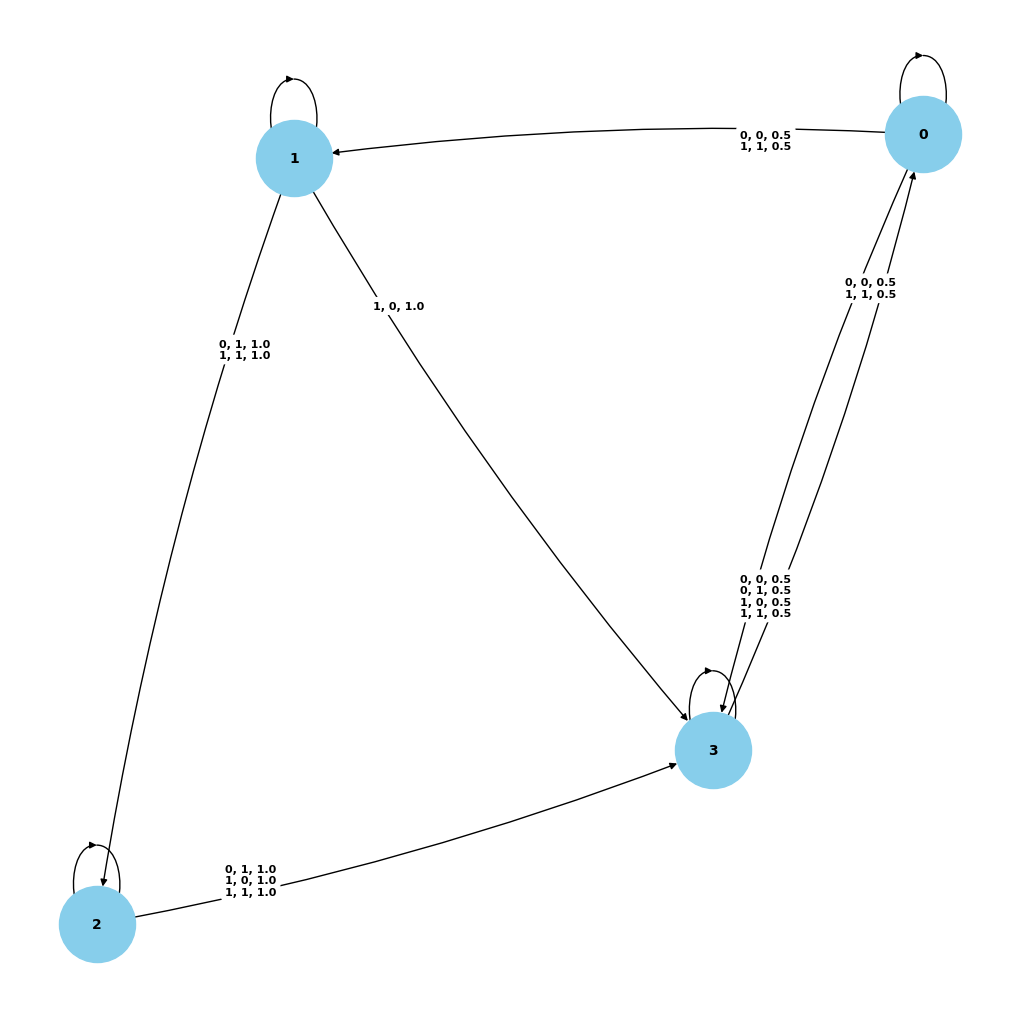

In [7]:
# draw graph with labels
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G) # possible values: spring_layout, shell_layout, random_layout, circular_layout, kamada_kawai_layout, spectral_layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", connectionstyle='arc3, rad = 0.05')
# draw labels on the edges, near the starting node
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_weight='bold', label_pos=0.75, rotate=False)
